In [106]:
# laoding libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import joblib
import seaborn as sns

pd.set_option('display.max_columns', None)

In [107]:
# loading data
file_path = './daily_ridership_weather_holi_data.csv'
df = pd.read_csv(file_path, parse_dates=['date'])
print('data shape: ', df.shape)
df.head()



data shape:  (1325, 26)


,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,weekend,weather_categories,ridership,holidayName,is_holiday
0,2021-05-17,2.0,73.2605,49.230500,61.965496,73.28378,46.221603,59.330765,0,0,52304.660,48824.312,0.0,0.0,0.0,0.0,11.805341,23.264800,219.91373,25.93,0.197353,0,Clear or Fair Weather,2029893,No holiday,0
1,2021-05-18,3.0,79.6505,51.930500,66.926750,76.98160,48.650776,64.101105,0,0,52414.355,48361.410,0.0,0.0,0.0,0.0,9.223387,16.330101,254.71307,24.97,0.212411,0,Clear or Fair Weather,2160226,No holiday,0
2,2021-05-19,3.0,83.5205,55.440500,69.382990,81.58029,53.284020,67.238690,0,0,52521.727,49024.887,0.0,0.0,0.0,0.0,11.858211,22.593700,350.79745,28.52,0.247352,0,Clear or Fair Weather,2267376,No holiday,0
3,2021-05-20,3.0,70.8305,54.090500,61.635498,67.69969,52.316616,58.842113,0,0,52626.652,49004.203,0.0,0.0,0.0,0.0,12.545163,23.041100,145.46165,28.03,0.195585,0,Clear or Fair Weather,2278700,No holiday,0
4,2021-05-21,3.0,73.4405,53.100502,63.814250,73.14134,50.822243,61.701250,0,0,52728.977,49215.938,0.0,0.0,0.0,0.0,12.211643,23.264800,173.92244,28.03,0.200039,0,Clear or Fair Weather,2338148,No holiday,0


### Exploratory Data Analysis

In [108]:
print("Printing nulls: ", df.isnull().sum())
df.describe()

Printing nulls:  date                           0
weather_code                   0
temperature_2m_max             0
temperature_2m_min             0
temperature_2m_mean            0
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      0
sunrise                        0
sunset                         0
daylight_duration              0
sunshine_duration              0
precipitation_sum              0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
weekend                        0
weather_categories             0
ridership                      0
holidayName                    0
is_holiday                     0
dtype: int64


,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,weekend,ridership,is_holiday
count,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.0,1325.0,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1.325000e+03,1325.000000
mean,31.457358,64.633541,48.176583,56.100550,61.853144,44.436457,52.974819,0.0,0.0,44106.620657,30656.036575,0.154262,0.149256,0.035088,3.670943,13.186178,23.713382,205.447928,14.873653,0.114372,0.285283,2.965145e+06,0.031698
std,28.438714,17.218366,16.089835,16.262701,21.860791,20.461783,20.780197,0.0,0.0,7341.172693,14685.719332,0.410067,0.408367,0.305278,5.434764,4.289828,7.196711,99.049678,7.429273,0.067362,0.451720,8.257943e+05,0.175261
min,0.000000,18.360500,0.540497,12.506751,9.128141,-11.341751,-1.811794,0.0,0.0,33294.400000,0.000000,0.000000,0.000000,0.000000,0.000000,3.882661,7.605800,0.099794,1.050000,0.009508,0.000000,7.483310e+05,0.000000
25%,3.000000,50.670500,35.190500,42.390500,43.838573,27.672165,35.375896,0.0,0.0,36957.363000,22748.178000,0.000000,0.000000,0.000000,0.000000,10.183879,18.790798,135.414520,8.810000,0.055344,0.000000,2.270076e+06,0.000000
50%,51.000000,66.420500,49.140500,57.360504,62.780400,44.267788,53.330738,0.0,0.0,44312.332000,33322.773000,0.003937,0.000000,0.000000,1.000000,12.608824,22.593700,222.267960,14.370000,0.104829,0.000000,3.151137e+06,0.000000
75%,61.000000,79.380490,62.370500,70.485500,80.787926,61.763386,70.871880,0.0,0.0,51401.535000,42275.047000,0.118110,0.110236,0.000000,6.000000,15.462832,27.515100,287.530240,21.240000,0.168427,1.000000,3.646292e+06,0.000000
max,75.000000,99.180500,78.930500,85.845500,104.938980,84.732330,92.446045,0.0,0.0,54347.190000,50400.000000,7.228347,7.228347,7.523622,24.000000,35.602750,61.741200,359.672580,30.290000,0.324364,1.000000,4.570716e+06,1.000000


In [109]:
print('Count of sunset not equal to zero', sum(df['sunset'] !=0))
print('Count of sunset not equal to zero',sum(df['sunrise'] !=0))
# sunset and sunrise cols are all 0's so removing them
df = df.drop(columns=['sunset', 'sunrise'])

Count of sunset not equal to zero 0
Count of sunset not equal to zero 0


In [110]:
numeric_columns = ['weather_code','temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
    'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean',
    'daylight_duration', 'sunshine_duration',
    'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours',
    'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant',
    'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'weekend', 'is_holiday'
]
df[numeric_columns] = df[numeric_columns].astype('float64')

/var/folders/02/nw__lfcn0wx_1ww6266fv69m0000gn/T/ipykernel_88155/3032696047.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


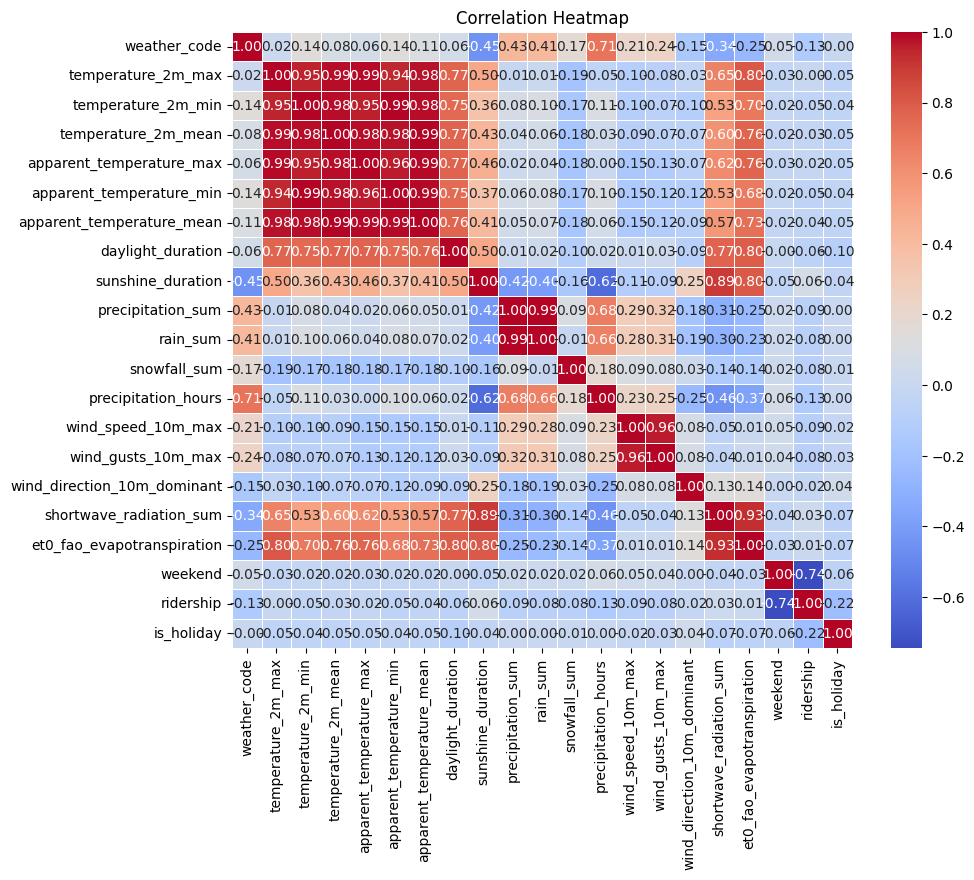

In [111]:
def correlation_heatmap(df, title="Correlation Heatmap"):
    correlation_matrix = df.corr()
    # Create the heatmap
    plt.figure(figsize=(10, 8))  # Adjust figure size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(title)
    plt.show()

# correlation heat map plot
correlation_heatmap(df, "Correlation Heatmap")

### Correlation analysis
* Temperature values (min, max, range, average) are obviously correlated so we need to adjust them
* daytime duration and sunshine duration are also moderately correlated to temperaure values
* Precipitation and rain are higly correlated (0.99) so we need to remove one, since they are basically duplicates. precipitation hours is also moderately correlated so we need to keep that in mind during further analysis 

## Histogram Analysis
* Day light duration has a bimodal peaks, which does not look normal. We might need to dig further to see find the reason and test if the residuslas are normally distributed
* precipitaiton hours and snowfall values are strongly right skewed. We might wanna consider scaling them to log scales,square root or Box-Cox

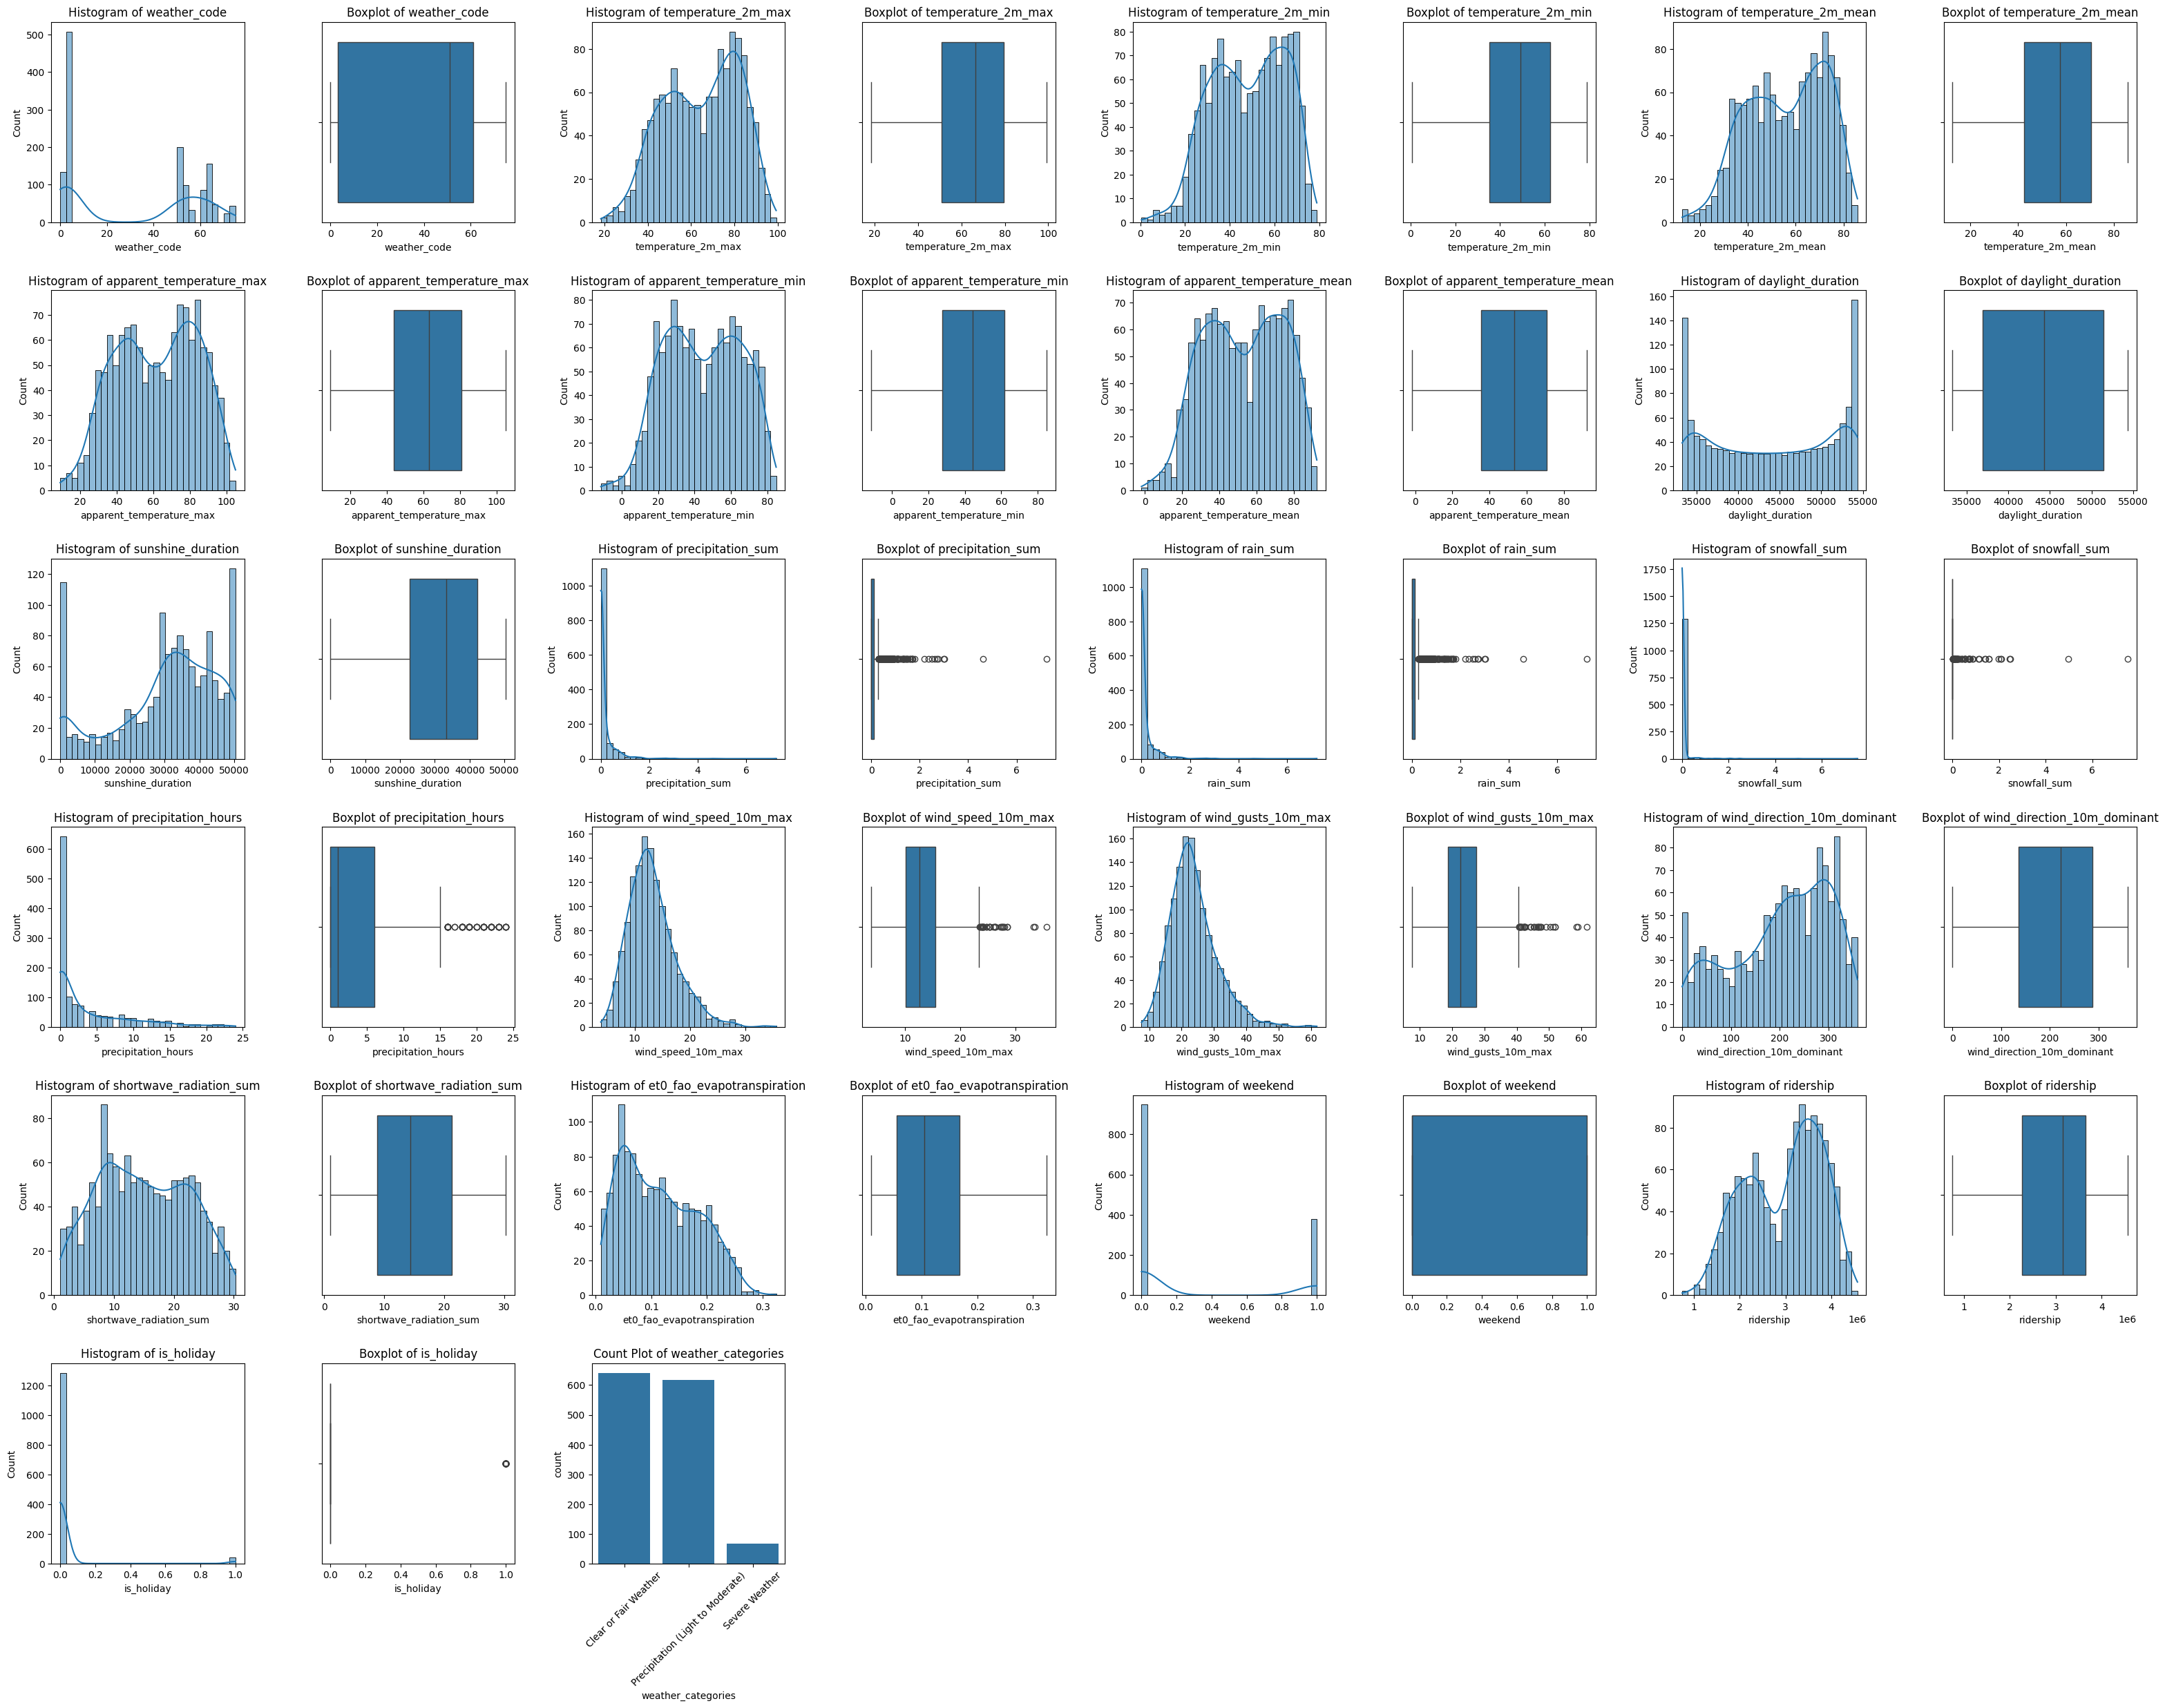

In [112]:
def univariate_analysis(df, numerical_features=None, categorical_features=None):
    if numerical_features is None:
        numerical_features = df.select_dtypes(include=['number']).columns.tolist()

    if categorical_features is None:
        categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

    num_numerical = len(numerical_features)
    num_categorical = len(categorical_features)

    # Calculate total subplots
    total_subplots = num_numerical * 2 + num_categorical * 2

    if total_subplots == 0:
        print("No numerical or categorical features found.")
        return

    # Calculate rows and columns for subplots
    cols = 8
    rows = math.ceil(total_subplots / cols)

    # Create figure and subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4)) #adjust figure size as needed
    fig.tight_layout(pad=5.0) #adjust padding as needed.

    plot_index = 0

    # Numerical Features Analysis
    for feature in numerical_features:
        # Histograms
        if plot_index < total_subplots:
            ax = axes.flatten()[plot_index]
            sns.histplot(df[feature], kde=True, ax=ax, bins = 30)
            ax.set_title(f"Histogram of {feature}")
            plot_index += 1

        # Box plots
        if plot_index < total_subplots:
            ax = axes.flatten()[plot_index]
            sns.boxplot(x=df[feature], ax=ax)
            ax.set_title(f"Boxplot of {feature}")
            plot_index += 1

    # Categorical Features Analysis
    for feature in categorical_features:
        # Count plots
        if plot_index < total_subplots:
            ax = axes.flatten()[plot_index]
            sns.countplot(x=df[feature], ax=ax)
            ax.set_title(f"Count Plot of {feature}")
            ax.tick_params(axis='x', rotation=45)
            plot_index += 1

    while plot_index < rows * cols:
        fig.delaxes(axes.flatten()[plot_index])
        plot_index += 1

    plt.show()
# performing univariate histogram analysis    
univariate_analysis(df.drop("holidayName", axis = 1))

* Few variables such as precipitation, rain, snowfall, precipitation hour are right skewed. We might need to perform log scale to adjust them
* daylight_duration looks to have bimodal peaks, which demands further explainaiton as it does not look normally distributed

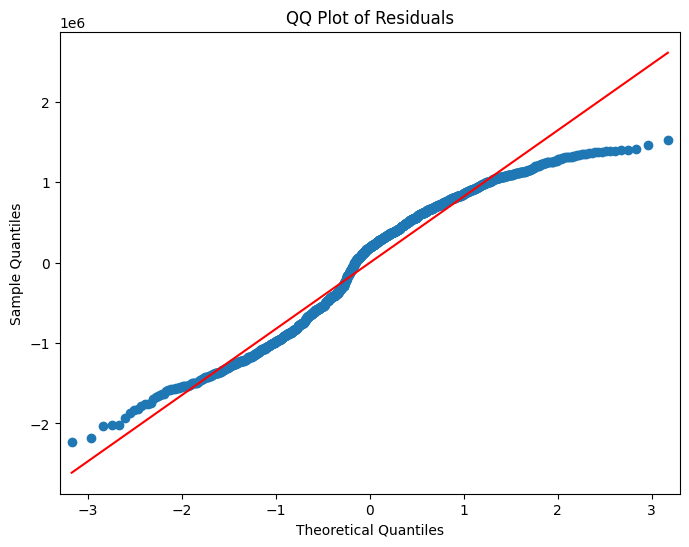

In [113]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot  

def qq_plot_residuals(df, target_col, feature_cols):

    y = df[target_col]
    X = df[feature_cols]
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    residuals = model.resid

    plt.figure(figsize=(8, 6))
    qqplot(residuals, line='s', ax=plt.gca()) 
    plt.title("QQ Plot of Residuals")
    plt.show()

qq_plot_residuals(df, 'ridership', ['daylight_duration'])

### As seen in the QQ Plot, overall, teh daylight duration follows the red line trend but S-tail can be seen on teh ends, suggesitng some normal assuption violations. We could experiment with other non-parametric and GML methods that does not rely on normality assumptions like K-NN Regression, Deision Tree Regression, Random Forest, etc. 

In [114]:
# X = df.drop(columns=['ridership', 'holidayName', 'date'])
# y = df['ridership']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



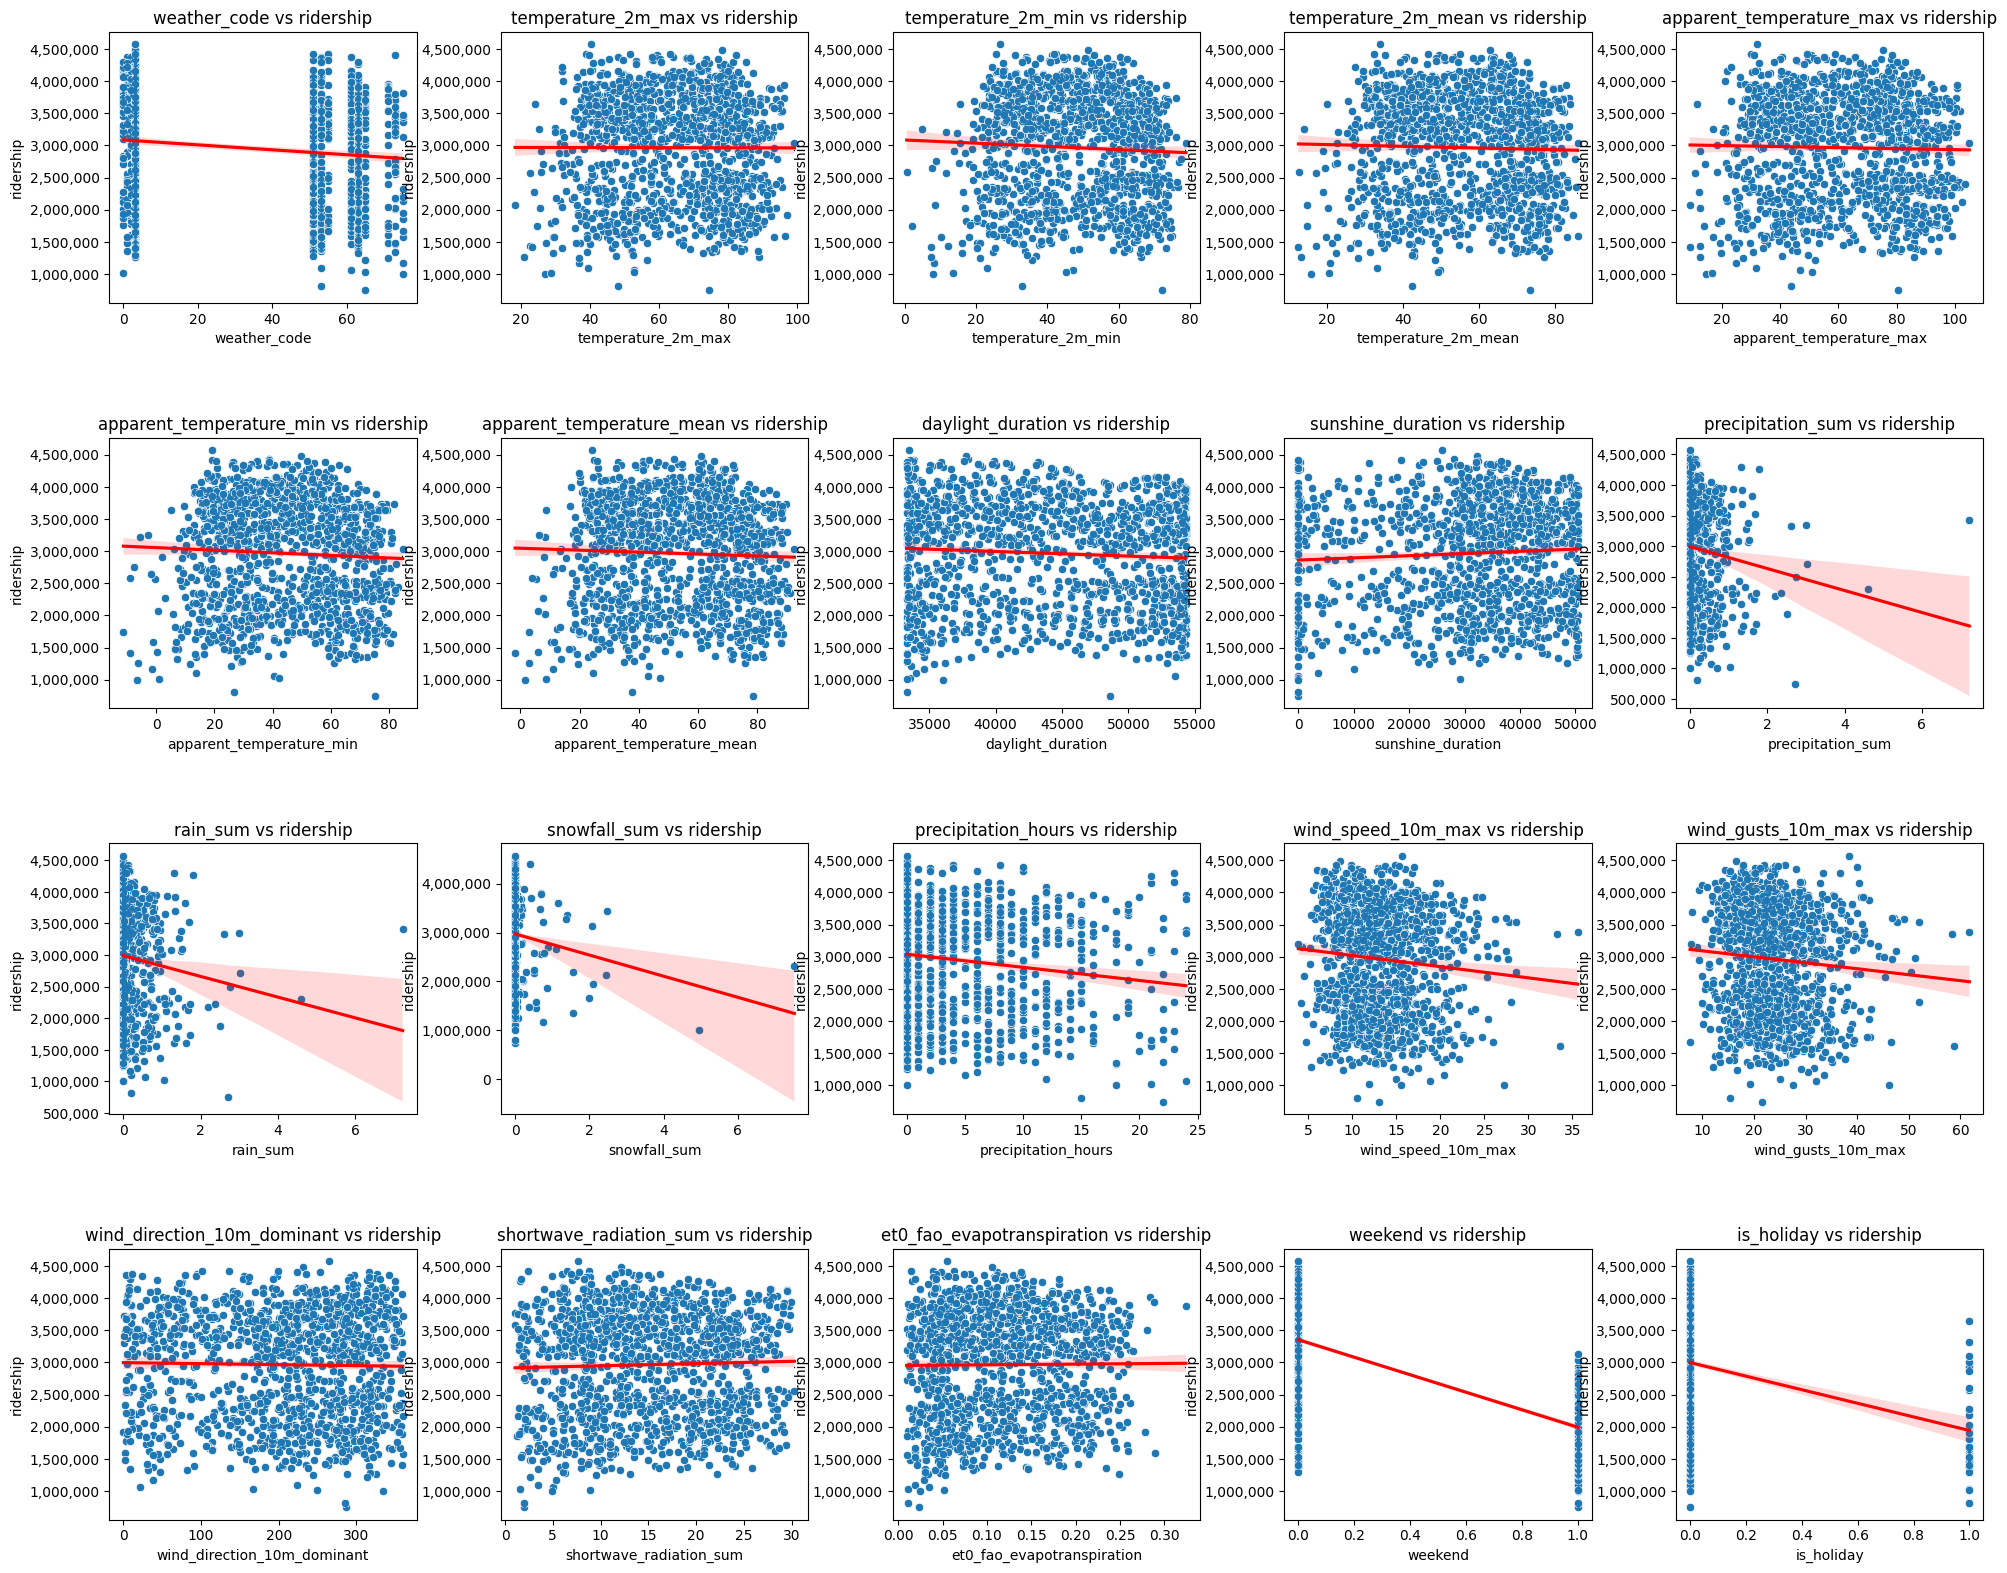

In [115]:
def scatter_subplots_vs_response(df, response_variable):
    feature_columns = [col for col in df.columns if col != response_variable]
    num_features = len(feature_columns)
    cols = 5
    rows = math.ceil(num_features / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    fig.tight_layout(pad=3.0)

    for i, feature in enumerate(feature_columns):
        row = i // cols
        col = i % cols
        ax = axes[row, col] if rows > 1 else axes[col] #handles 1 row case

        sns.scatterplot(x=df[feature], y=df[response_variable], ax=ax)
        sns.regplot(x=df[feature], y=df[response_variable], ax=ax, scatter_kws={'s': 1}, line_kws={'color': 'red'}) #Adjust scatter size and line color as needed.

        ax.set_title(f"{feature} vs {response_variable}")
        ax.set_xlabel(feature)
        ax.set_ylabel(response_variable)
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


    # Remove empty subplots
    for i in range(num_features, rows * cols):
        row = i // cols
        col = i % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        fig.delaxes(ax)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

scatter_subplots_vs_response(df.drop(['holidayName', 'date', 'weather_categories'], axis =1), 'ridership')

### Based on these scatter plots, we can tell that:
* snowfall, windspeed, rain/precipitations, weekend, and holiday have relatively stronger relationship with daily ridership
* Temperature measures such as min, max, mean, and apparent temperatures show relatively weaker relationship with daily ridership

## Analysing Categorical variables

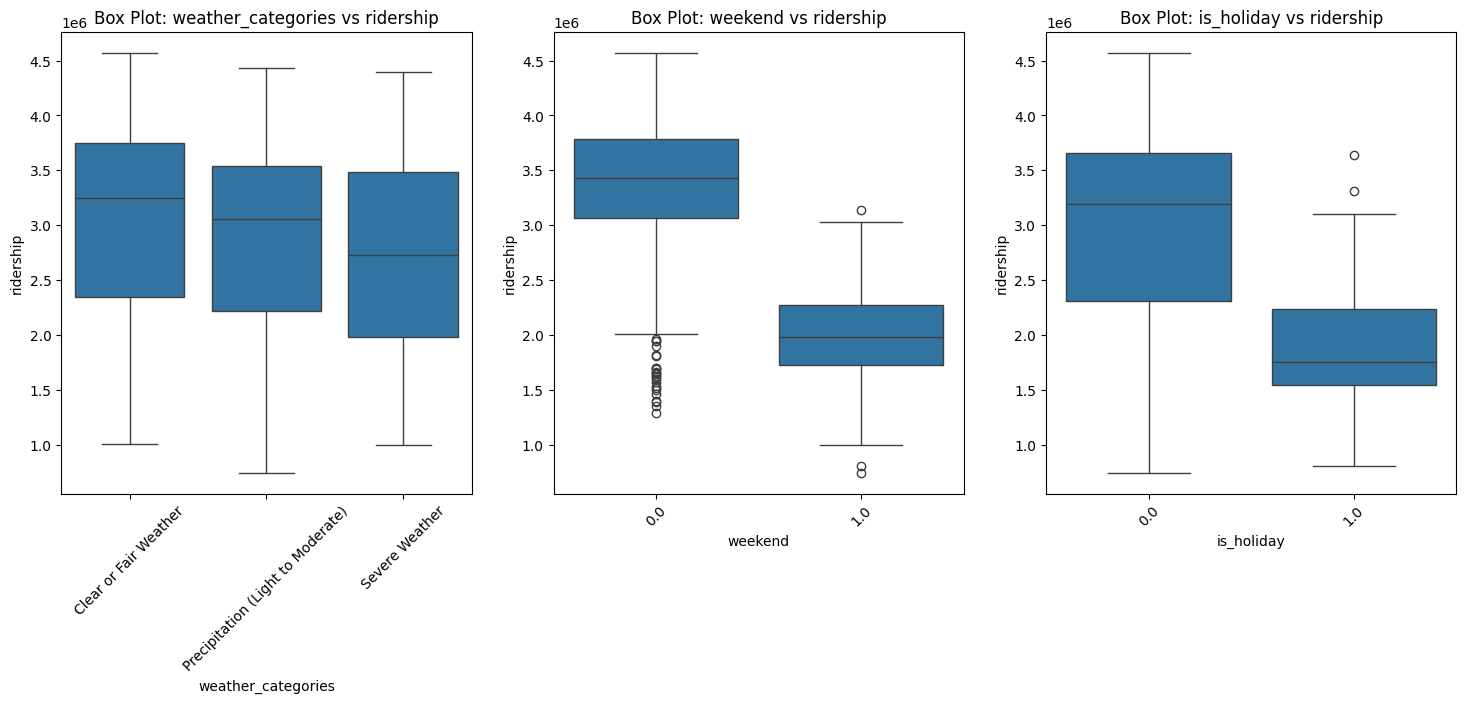

In [116]:
def boxplot_categorical_vs_response(df, categorical_features, response_variable):
    """
    Creates box plots for each categorical variable against a response variable.

    Args:
        df: The Pandas DataFrame.
        categorical_features: A list of categorical column names.
        response_variable: The name of the response variable column.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, feature in enumerate(categorical_features):
        sns.boxplot(x=feature, y=response_variable, data=df, ax=axes[i])
        axes[i].set_title(f"Box Plot: {feature} vs {response_variable}")
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(response_variable)
        axes[i].tick_params(axis='x', rotation=45)  
    plt.show()

category_cols = ['weather_categories', 'weekend', 'is_holiday']
boxplot_categorical_vs_response(df, category_cols, 'ridership')

### Clearly, we can see that the ridership differs across our categorical variables.

## Feature scaling and further data cleaning

Correlation between temperature fluctuation and temperature mean: 22.628590160813346 


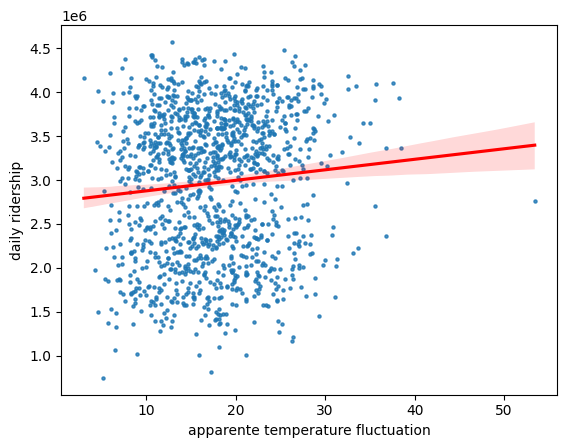

,date,weather_code,temperature_2m_mean,apparent_temperature_mean,daylight_duration,sunshine_duration,precipitation_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,weekend,ridership,holidayName,is_holiday,apparent_temp_range,weather_categories_Clear or Fair Weather,weather_categories_Precipitation (Light to Moderate),weather_categories_Severe Weather
0,2021-05-17,2.0,61.965496,59.330765,52304.660,48824.312,0.0,0.0,0.0,11.805341,219.91373,25.93,0.197353,0.0,2029893,No holiday,0.0,27.062177,1,0,0
1,2021-05-18,3.0,66.926750,64.101105,52414.355,48361.410,0.0,0.0,0.0,9.223387,254.71307,24.97,0.212411,0.0,2160226,No holiday,0.0,28.330824,1,0,0
2,2021-05-19,3.0,69.382990,67.238690,52521.727,49024.887,0.0,0.0,0.0,11.858211,350.79745,28.52,0.247352,0.0,2267376,No holiday,0.0,28.296270,1,0,0
3,2021-05-20,3.0,61.635498,58.842113,52626.652,49004.203,0.0,0.0,0.0,12.545163,145.46165,28.03,0.195585,0.0,2278700,No holiday,0.0,15.383074,1,0,0
4,2021-05-21,3.0,63.814250,61.701250,52728.977,49215.938,0.0,0.0,0.0,12.211643,173.92244,28.03,0.200039,0.0,2338148,No holiday,0.0,22.319097,1,0,0


In [137]:
cols_to_drop = [
    'temperature_2m_max','temperature_2m_min', # mean temp captures this info. it is 98% plus  correlated with mean
    'apparent_temperature_max', 'apparent_temperature_min', # mean apparent temperature (feels like temp) captures this, 98% plus correlated with mean
    'rain_sum', # duplicate of percepitation
    'wind_gusts_10m_max', # 96% correlated with wind_speed_10m_max
]
df["apparent_temp_range"] = df["apparent_temperature_max"] - df["apparent_temperature_min"]
correlation = df["apparent_temp_range"].corr(df["apparent_temperature_mean"])
print(f'Correlation between temperature fluctuation and temperature mean: {correlation * 100} ') # 22%, which is much better than min, max of 95% plus

sns.regplot(x="apparent_temp_range", y="ridership", data=df, scatter_kws={'s': 5}, line_kws={'color': 'red'}) 
plt.xlabel("apparente temperature fluctuation")
plt.ylabel("daily ridership")
plt.show()

df_clean = df.drop(cols_to_drop, axis=1)
df_clean.head()

# one hot encoded the weather categories
def one_hot_encode_pandas(df, categorical_col):
    df_encoded = pd.get_dummies(df, columns=[categorical_col], prefix=categorical_col)
    return df_encoded
df_clean = one_hot_encode_pandas(df_clean, 'weather_categories')
df_clean.head()

In [138]:
# scaling the right skewed columns such as percepitation, snow, etc.

def log_scale_columns(df, columns_to_log):
    df_copy = df.copy() #Create a copy to avoid modifying the original.

    for col in columns_to_log:
        if col in df_copy.columns:
            # Handling potential zero or negative values by adding a small constant
            min_val = df_copy[col].min()
            if min_val <= 0:
                constant = abs(min_val) + 1  # Add a small constant to make all values positive
                df_copy[col] = np.log(df_copy[col] + constant)
            else:
                df_copy[col] = np.log(df_copy[col])
        else:
            print(f"Column '{col}' not found in DataFrame.")

    return df_copy

cols_to_log = ['precipitation_sum', 'precipitation_hours', 'snowfall_sum'] 
df_clean = log_scale_columns(df_clean, cols_to_log)
df_clean.head()


,date,weather_code,temperature_2m_mean,apparent_temperature_mean,daylight_duration,sunshine_duration,precipitation_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,weekend,ridership,holidayName,is_holiday,apparent_temp_range,weather_categories_Clear or Fair Weather,weather_categories_Precipitation (Light to Moderate),weather_categories_Severe Weather
0,2021-05-17,2.0,61.965496,59.330765,52304.660,48824.312,0.0,0.0,0.0,11.805341,219.91373,25.93,0.197353,0.0,2029893,No holiday,0.0,27.062177,1,0,0
1,2021-05-18,3.0,66.926750,64.101105,52414.355,48361.410,0.0,0.0,0.0,9.223387,254.71307,24.97,0.212411,0.0,2160226,No holiday,0.0,28.330824,1,0,0
2,2021-05-19,3.0,69.382990,67.238690,52521.727,49024.887,0.0,0.0,0.0,11.858211,350.79745,28.52,0.247352,0.0,2267376,No holiday,0.0,28.296270,1,0,0
3,2021-05-20,3.0,61.635498,58.842113,52626.652,49004.203,0.0,0.0,0.0,12.545163,145.46165,28.03,0.195585,0.0,2278700,No holiday,0.0,15.383074,1,0,0
4,2021-05-21,3.0,63.814250,61.701250,52728.977,49215.938,0.0,0.0,0.0,12.211643,173.92244,28.03,0.200039,0.0,2338148,No holiday,0.0,22.319097,1,0,0


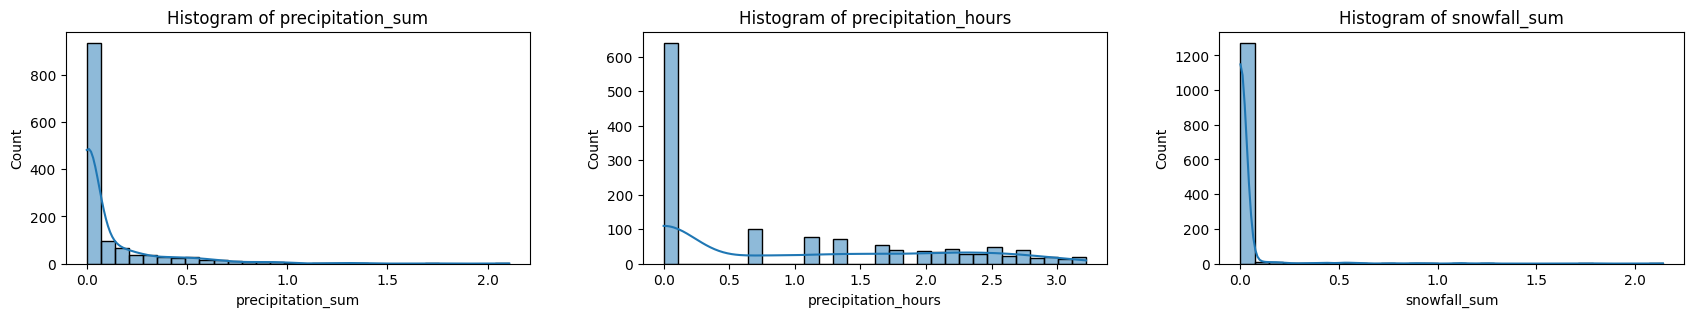

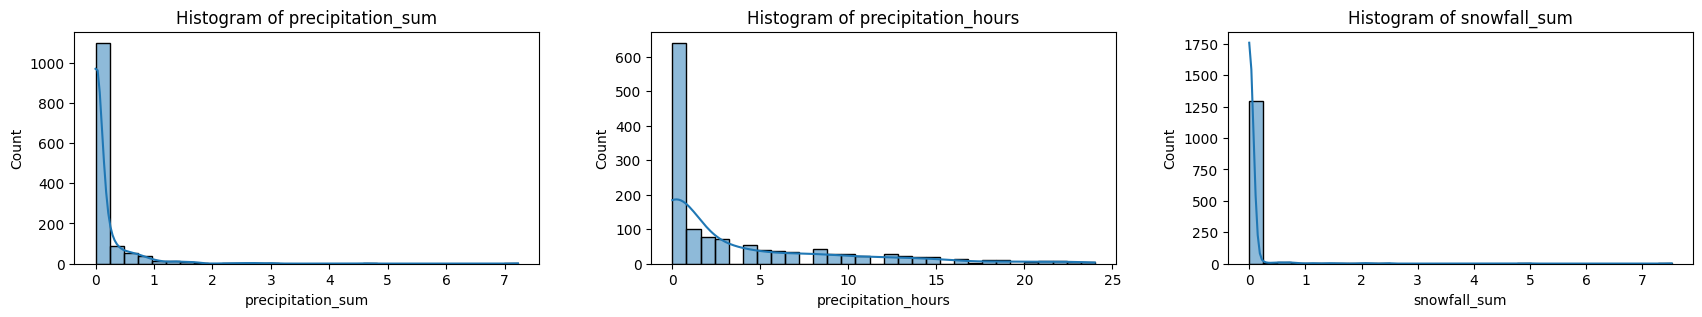

In [139]:
# Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(3*6,4))
fig.tight_layout(pad=5.0) #adjust padding as needed.

# Numerical Features Analysis
for i, feature in enumerate(cols_to_log):
    # Histograms
    ax = axes[i]
    sns.histplot(df_clean[feature], kde=True, ax=ax, bins = 30)
    ax.set_title(f"Histogram of {feature}")
fig, axes = plt.subplots(1, 3, figsize=(3*6,4))
fig.tight_layout(pad=5.0) #adjust padding as needed.
for i, feature in enumerate(cols_to_log):
    # Histograms
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax, bins = 30)
    ax.set_title(f"Histogram of {feature}")



## Model Fitting

In [142]:
X = df_clean.drop(columns=['ridership', 'holidayName', 'date'])
y = df_clean['ridership']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 226943511010.75134
R-squared: 0.6476229712356907
Coefficients: [-3.98659136e+03  1.05671710e+05 -7.99652993e+04 -1.39826906e+01
  3.79796777e-01 -1.03137774e+05 -1.99352464e+05  3.11590758e+04
 -2.57452025e+04 -3.52667616e+02  1.62441893e+04 -3.04984301e+06
 -1.38685337e+06 -1.21790115e+06  1.24994953e+04 -9.87208719e+04
  7.50300933e+04  2.36907786e+04]
Intercept: 2732473.076842497


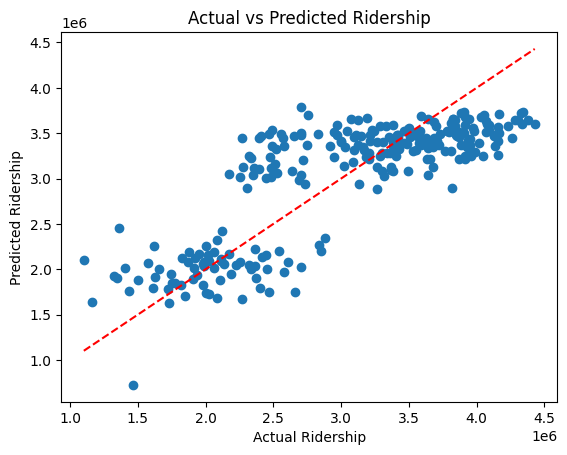

In [143]:
model = LinearRegression()

model.fit(X_train, y_train)

joblib.dump(model, './linear_regression_model.pkl')
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Ridership')
plt.ylabel('Predicted Ridership')
plt.title('Actual vs Predicted Ridership')
plt.savefig("Linear Regression Model Test.png")

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")